# Implement a Fuzzy controller to calculate the breakpower depending upon speed and distance

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [21]:
#setting scales
distance = ctrl.Antecedent(np.arange(0, 300, 1), 'distance')     #input
speed = ctrl.Antecedent(np.arange(0, 15, 1), 'speed')            #input  
breakpower = ctrl.Consequent(np.arange(0, 75, 1), 'breakpower')  #output

In [23]:
distance['SD']= fuzz.trimf(distance.universe,[0,100,200])
distance['MD']= fuzz.trimf(distance.universe,[100,200,300])
distance['LD']= fuzz.trimf(distance.universe,[200,300,400])

In [24]:
speed['SS']= fuzz.trimf(speed.universe,[0,5,10])
speed['MS']= fuzz.trimf(speed.universe,[5,10,15])
speed['LS']= fuzz.trimf(speed.universe,[10,15,20])

In [25]:
breakpower['SB']= fuzz.trimf(breakpower.universe,[0,25,50])
breakpower['MB']= fuzz.trimf(breakpower.universe,[25,50,75])
breakpower['LB']= fuzz.trimf(breakpower.universe,[50,75,100])

C:\Users\manik\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


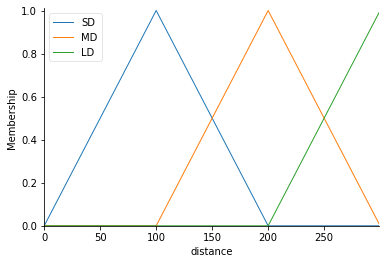

In [26]:
distance.view()

C:\Users\manik\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


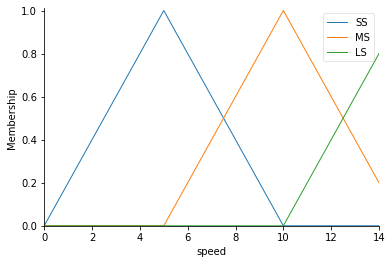

In [27]:
speed.view()

C:\Users\manik\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


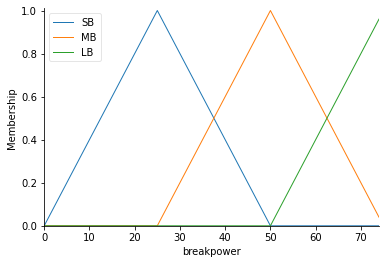

In [37]:
breakpower.view()

In [29]:
#setting rules
rule1 = ctrl.Rule(distance['SD'] & speed['SS'], breakpower['SB'])
rule2 = ctrl.Rule(distance['MD'] & speed["MS"], breakpower['MB'])
rule3 = ctrl.Rule(distance['LD'] & speed['LS'], breakpower['LB'])
rule4 = ctrl.Rule(distance['SD'] & speed['LS'], breakpower["LB"])
rule5= ctrl.Rule(distance['LD'] & speed['SS'], breakpower["SB"])
rule6= ctrl.Rule(distance['MD'] & speed['LS'], breakpower["LB"])
rule7= ctrl.Rule(distance['MD'] & speed['SS'], breakpower["SB"])
rule8 = ctrl.Rule(distance['LD'] & speed['MS'], breakpower["MB"])
rule9= ctrl.Rule(distance['SD'] & speed['MS'], breakpower["MB"])

In [30]:
#controller
breaker_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9])
breakpowera = ctrl.ControlSystemSimulation(breaker_ctrl)

In [59]:
breakpowera.input['distance'] = 100
breakpowera.input['speed'] = 10

In [60]:
breakpowera.compute()  

49.98051774753136


C:\Users\manik\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


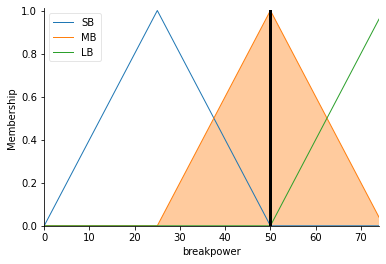

In [61]:
print(breakpowera.output['breakpower'])
breakpower.view(sim=breakpowera)